### Data cleaning and EDA on titanic dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
total = float(len(df))

def show_frac(c):
    for i in c.patches:
        height = i.get_height()
        #c.text(i.get_x()+i.get_width()/2. ,  height , '{}({:1.2f} %)'.format(height,(height/total)*100), ha="center" )
        c.text(i.get_x()+i.get_width()/2. ,  height , '{}'.format(height), ha="center" )

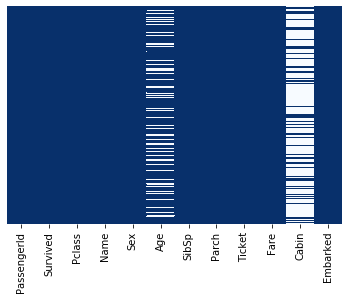

In [6]:
# to check the NaN vlaues in all the columns of dataset
sns.heatmap(df.isnull(),yticklabels=False,cmap="Blues_r", cbar=False)

In [7]:
# check is any column contains null or balnk value
for i in df.columns:
    print('NaN values in column {} = {}'.format(i,df[i].isnull().sum()))

NaN values in column PassengerId = 0
NaN values in column Survived = 0
NaN values in column Pclass = 0
NaN values in column Name = 0
NaN values in column Sex = 0
NaN values in column Age = 177
NaN values in column SibSp = 0
NaN values in column Parch = 0
NaN values in column Ticket = 0
NaN values in column Fare = 0
NaN values in column Cabin = 687
NaN values in column Embarked = 2


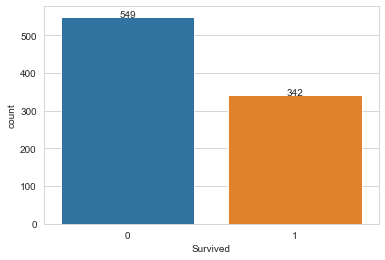

In [8]:
# style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set_style('whitegrid')

c = sns.countplot(df.Survived)
show_frac(c)

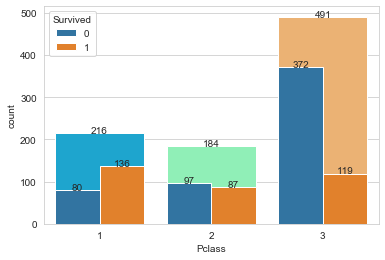

In [9]:
sns.set_style('whitegrid')
c = sns.countplot(x='Pclass',data=df, palette='rainbow')
c = sns.countplot(x='Pclass',hue='Survived',data=df)
show_frac(c)

# Class 1: 37.07% not survived, 62.96% Survived
# Class 2: 52.71% not survived, 47.28% Survived
# Class 3: 75.76% not survived, 24.23% Survived

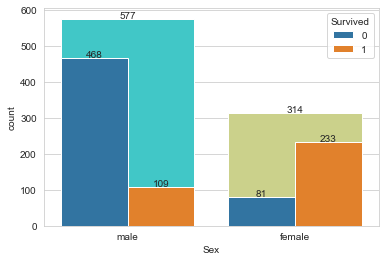

In [10]:
sns.set_style('whitegrid')

c = sns.countplot(x = 'Sex', data=df, palette='rainbow')
c = sns.countplot(x = 'Sex', hue='Survived' ,data=df)
show_frac(c)

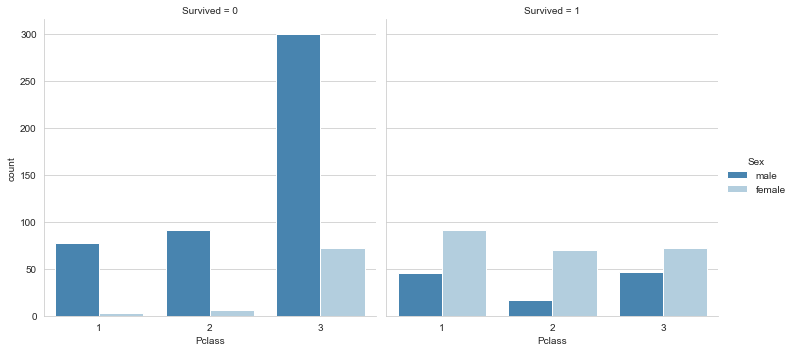

In [11]:
sns.set_style('whitegrid')

plt = sns.catplot(x='Pclass',hue='Sex',col='Survived',data=df,palette='Blues_r',kind="count")

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


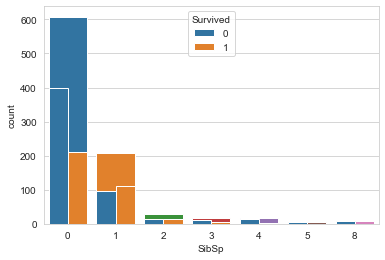

In [13]:
c=sns.countplot(x='SibSp',data=df)
c=sns.countplot(x='SibSp',hue='Survived' ,data=df)

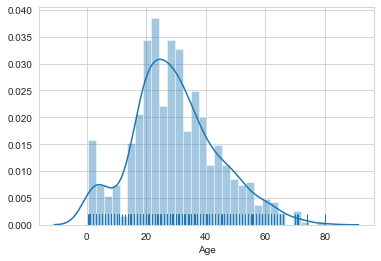

In [14]:
sns.distplot(df.Age.dropna(),bins=30,rug=True)

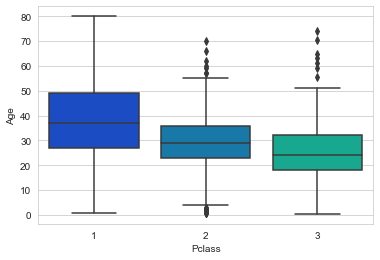

In [15]:
# repalce NaN in age by average age of pClass
#plt.figure(figsize = (10,6))
sns.boxplot(x='Pclass', y='Age', data =df, palette = 'winter')

In [16]:
df.loc[((df['Age'].isnull() == True) & (df['Pclass'] == 1)),'Age'] = np.round(df.loc[(  (df['Age'].isnull() == False) & (df['Pclass'] == 1)  ), 'Age' ].mean())

In [17]:
df.loc[((df['Age'].isnull() == True) & (df['Pclass'] == 2)  ), 'Age' ] = np.round(df.loc[(  (df['Age'].isnull() == False) & (df['Pclass'] == 2)  ), 'Age' ].mean())

In [18]:
df.loc[((df['Age'].isnull() == True) & (df['Pclass'] == 3)  ), 'Age' ] = np.round(df.loc[(  (df['Age'].isnull() == False) & (df['Pclass'] == 3)  ), 'Age' ].mean())

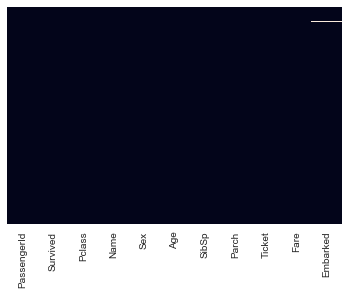

In [21]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False )

In [20]:
df.drop('Cabin', axis = 'columns', inplace=True)

In [22]:
df = df.loc[df['Embarked'].isnull() == False]

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
df.drop(['PassengerId','Name','Ticket','Fare'], axis='columns', inplace=True)

C:\Users\44QRQZ1\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [26]:
df_sex= pd.get_dummies(df.Sex,drop_first=True,prefix='Sex')

In [27]:
df_embarked = pd.get_dummies(df.Embarked,drop_first=True,prefix='Embarked')

In [28]:
train = pd.concat([df,df_sex,df_embarked], axis='columns')

In [29]:
train.drop(['Sex','Embarked'], axis = 'columns', inplace = True)

In [30]:
X = train.drop('Survived', axis='columns')

In [31]:
y = train.Survived

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [34]:
lr = LogisticRegression()

In [35]:
model = lr.fit(X_train,y_train)

In [36]:
pred = model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
acc = confusion_matrix(y_test,pred)

In [39]:
acc

array([[125,  11],
       [ 27,  60]], dtype=int64)

In [40]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.8295964125560538

In [41]:
model.score(X_test,y_test)

0.8295964125560538

In [71]:
df2 = pd.read_csv('train.csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


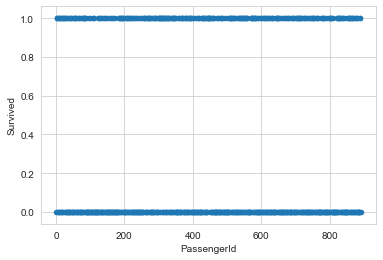

In [72]:
df2.plot(x='PassengerId',y='Survived',kind='scatter')